In [ ]:
!pip install pyswarm

In [ ]:
!pip install deap xgboost scikit-learn

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/human-activity-recognition-with-smartphones


In [ ]:
import os
os.listdir(path)

['train.csv', 'test.csv']

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv(path+'/train.csv')
test=pd.read_csv(path+'/test.csv')

In [ ]:
train.shape

(7352, 563)

In [ ]:
test.shape

(2947, 563)

In [ ]:
train.dtypes

,0
tBodyAcc-mean()-X,float64
tBodyAcc-mean()-Y,float64
tBodyAcc-mean()-Z,float64
tBodyAcc-std()-X,float64
tBodyAcc-std()-Y,float64
...,...
"angle(X,gravityMean)",float64
"angle(Y,gravityMean)",float64
"angle(Z,gravityMean)",float64
subject,int64


In [ ]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

Preprocessing

In [ ]:
# Drop 'subject' column
train = train.drop(columns=['subject'])
test = test.drop(columns=['subject'])

# Separate features and labels
X_train = train.drop(columns=['Activity'])
y_train = train['Activity']

X_test = test.drop(columns=['Activity'])
y_test = test['Activity']

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

**Random Forest**

 Accuracy: 0.9260264675941635

 Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.88      0.91       491
          STANDING       0.90      0.95      0.92       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.97      0.85      0.90       420
  WALKING_UPSTAIRS       0.89      0.90      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



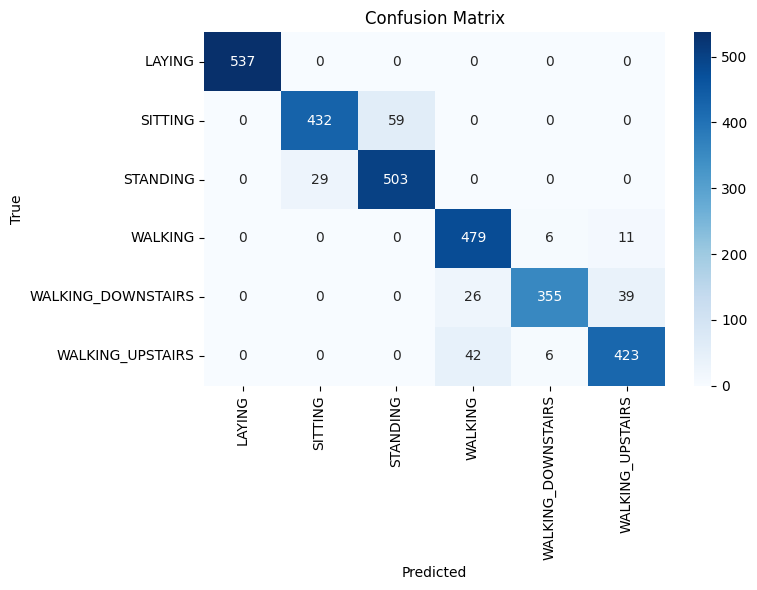

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


# Regularized Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
model.fit(X_train, y_train_enc)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9351883271123176

 Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
  WALKING_UPSTAIRS       0.92      0.92      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.94      0.93      2947



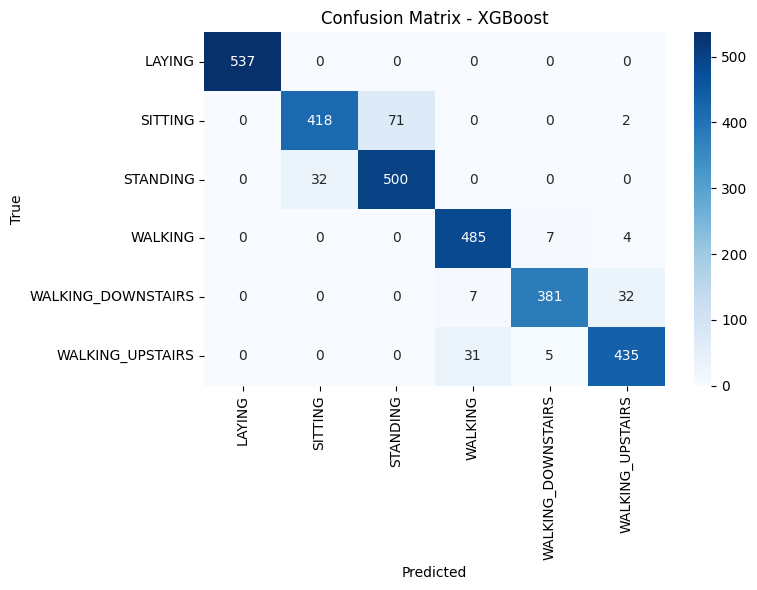

In [ ]:
# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Define and train XGBoost model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model.fit(X_train, y_train_enc)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.show()

**GA**

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 0: Best Fitness = 0.9237
Generation 1: Best Fitness = 0.9237
Generation 2: Best Fitness = 0.9237
Generation 3: Best Fitness = 0.9240
Generation 4: Best Fitness = 0.9240
Generation 5: Best Fitness = 0.9240
Generation 6: Best Fitness = 0.9240
Generation 7: Best Fitness = 0.9240
Generation 8: Best Fitness = 0.9248
Generation 9: Best Fitness = 0.9260

Selected Features:
['tBodyAcc-mean()-Y', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-Y', 'tBodyAcc-min()-Y', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-Z', 'tGravity

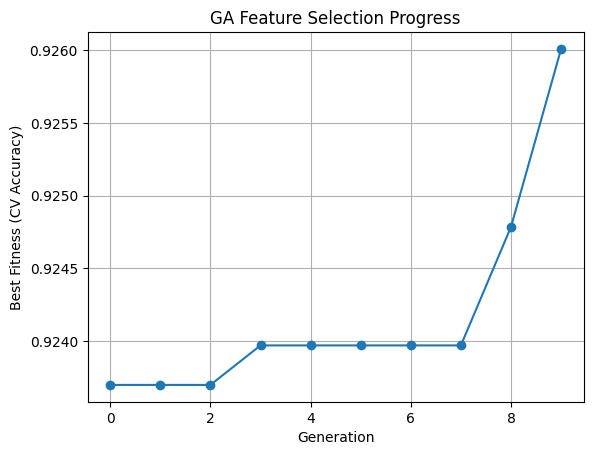

In [ ]:

# --- GA Setup ---
N_FEATURES = X_train.shape[1]

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=N_FEATURES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_individual(individual):
    selected = [i for i, bit in enumerate(individual) if bit == 1]
    if len(selected) == 0:
        return 0.0,
    clf = XGBClassifier(eval_metric='mlogloss', random_state=42)
    score = cross_val_score(clf, X_train.iloc[:, selected], y_train_enc, cv=3).mean()
    return score,

toolbox.register("evaluate", eval_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- Run GA ---
random.seed(42)
population = toolbox.population(n=20)
N_GEN = 10

best_individuals = []
for gen in range(N_GEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    top = tools.selBest(population, 1)[0]
    best_individuals.append((gen, top.fitness.values[0]))
    print(f"Generation {gen}: Best Fitness = {top.fitness.values[0]:.4f}")

# --- Selected Features ---
best = tools.selBest(population, 1)[0]
selected_features = [i for i, bit in enumerate(best) if bit == 1]
selected_feature_names = X_train.columns[selected_features]
print("\nSelected Features:")
print(selected_feature_names.tolist())

# --- Plot fitness progress ---
gen_nums, fitness_vals = zip(*best_individuals)
plt.plot(gen_nums, fitness_vals, marker='o')
plt.title("GA Feature Selection Progress")
plt.xlabel("Generation")
plt.ylabel("Best Fitness (CV Accuracy)")
plt.grid(True)
plt.show()

**Selected Feature from GA with XGBoost Classifier (XGBClassifier)**



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:52:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Accuracy: 0.9647098744485918

 Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.94      0.95       491
          STANDING       0.95      0.97      0.96       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.95      0.96       420
  WALKING_UPSTAIRS       0.96      0.93      0.95       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.96      0.96      2947



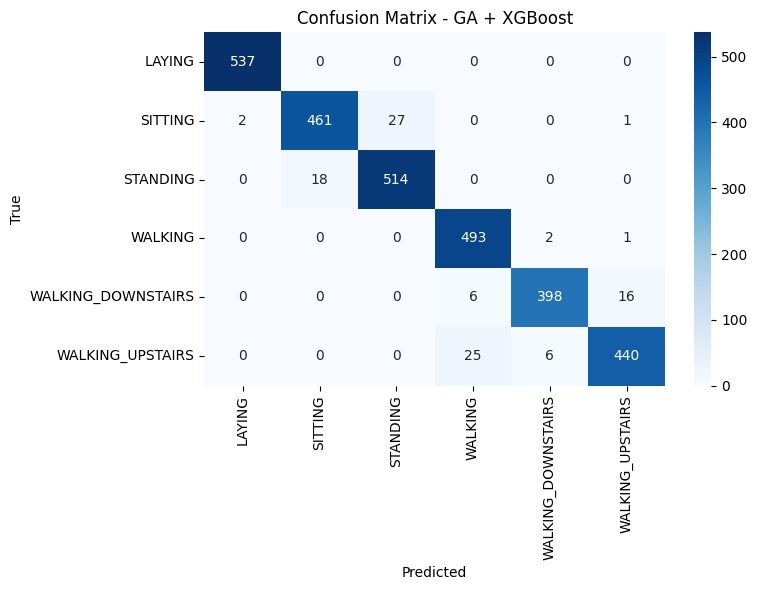

In [ ]:
# Train model on selected features
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train[selected_feature_names], y_train_enc)

# Evaluate
y_pred = model.predict(X_test[selected_feature_names])

print(" Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GA + XGBoost")
plt.tight_layout()
plt.show()

**Selected Features from GA in Random Forest**

Accuracy: 0.9392602646759416

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.91      0.98      0.94       496
WALKING_DOWNSTAIRS       0.96      0.87      0.91       420
  WALKING_UPSTAIRS       0.92      0.92      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



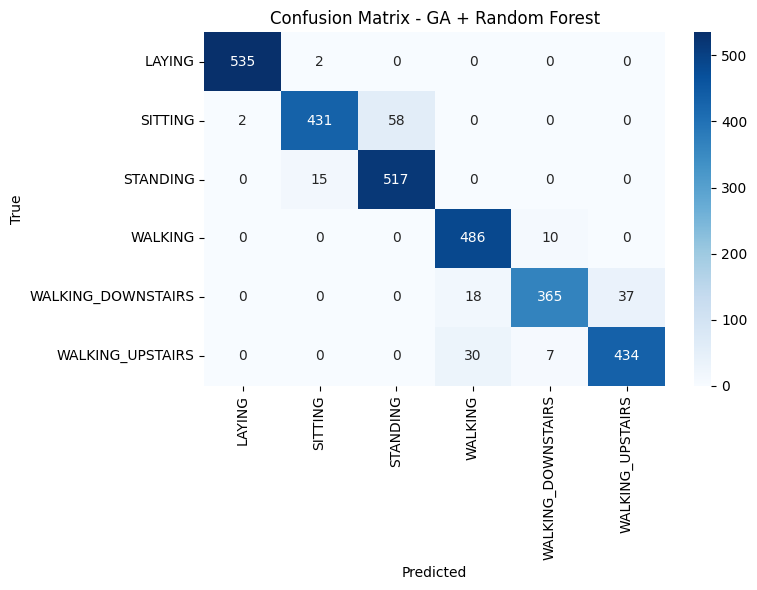

In [ ]:
# Train model on selected features using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_feature_names], y_train_enc)

# Evaluate
y_pred_rf = rf_model.predict(X_test[selected_feature_names])

print("Accuracy:", accuracy_score(y_test_enc, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GA + Random Forest")
plt.tight_layout()
plt.show()

**PSO**

In [ ]:
from pyswarm import pso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Convert DataFrame to NumPy arrays
X_full = X_train.values
y_full = y_train_enc

# Use only training data for PSO (split train further into training + validation)
X_pso_train, X_pso_val, y_pso_train, y_pso_val = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

# Define number of features
num_features = X_full.shape[1]
feature_names = X_train.columns

# Fitness function: returns 1 - accuracy (because PSO minimizes the objective)
def fitness_function(position):
    # Round to binary
    binary_position = np.round(position).astype(int)

    # If all zeros, return poor score
    if np.count_nonzero(binary_position) == 0:
        return 1.0

    # Select features
    selected_indices = np.where(binary_position == 1)[0]
    X_sel_train = X_pso_train[:, selected_indices]
    X_sel_val = X_pso_val[:, selected_indices]

    # Train and evaluate
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_sel_train, y_pso_train)
    y_pred = clf.predict(X_sel_val)

    acc = accuracy_score(y_pso_val, y_pred)
    return 1 - acc  # Because PSO minimizes

# Bounds: Each feature either 0 or 1 (binary mask)
lb = [0] * num_features
ub = [1] * num_features

# Run PSO
best_position, best_score = pso(fitness_function, lb, ub, swarmsize=30, maxiter=30)

# Convert best position to binary feature mask
best_features_mask = np.round(best_position).astype(int)
selected_feature_indices = np.where(best_features_mask == 1)[0]
selected_feature_names = feature_names[selected_feature_indices]

print("Selected features:", list(selected_feature_names))
print("Validation Accuracy with selected features:", 1 - best_score)


Stopping search: maximum iterations reached --> 30
Selected features: ['tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-std()-Y', 'tGravityAcc-std()-Z', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-sma()', 'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z', 'tGravityAcc-iqr()-Z', 'tGravityAcc-entropy()-Z', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Z,1', 'tGravityAc

**Random Forest on PSO Selected Features**

Accuracy: 0.9253478113335596

Classification Report:

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.90      0.96      0.93       496
WALKING_DOWNSTAIRS       0.97      0.87      0.92       420
  WALKING_UPSTAIRS       0.88      0.90      0.89       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947



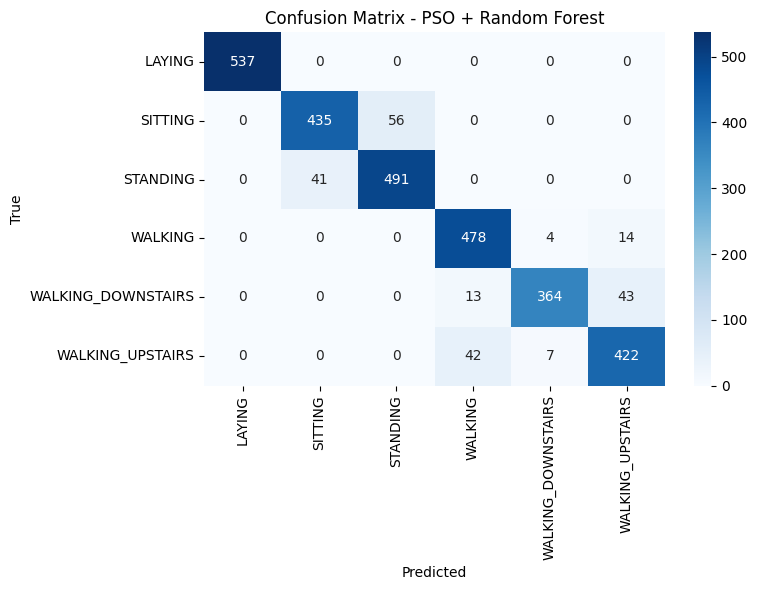

In [ ]:
# Train final RF model on selected features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train[selected_feature_names], y_train_enc)

# Predict and evaluate on test set
y_pred_rf = rf_model.predict(X_test[selected_feature_names])

print("Accuracy:", accuracy_score(y_test_enc, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred_rf, target_names=le.classes_))

# Confusion Matrix
cm_rf = confusion_matrix(y_test_enc, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - PSO + Random Forest")
plt.tight_layout()
plt.show()

**XGBOOST classifier on PSO selected**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:50:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Final Test Accuracy: 0.9331523583305056

 Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.84      0.89       491
          STANDING       0.87      0.95      0.91       532
           WALKING       0.93      0.97      0.95       496
WALKING_DOWNSTAIRS       0.96      0.91      0.94       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



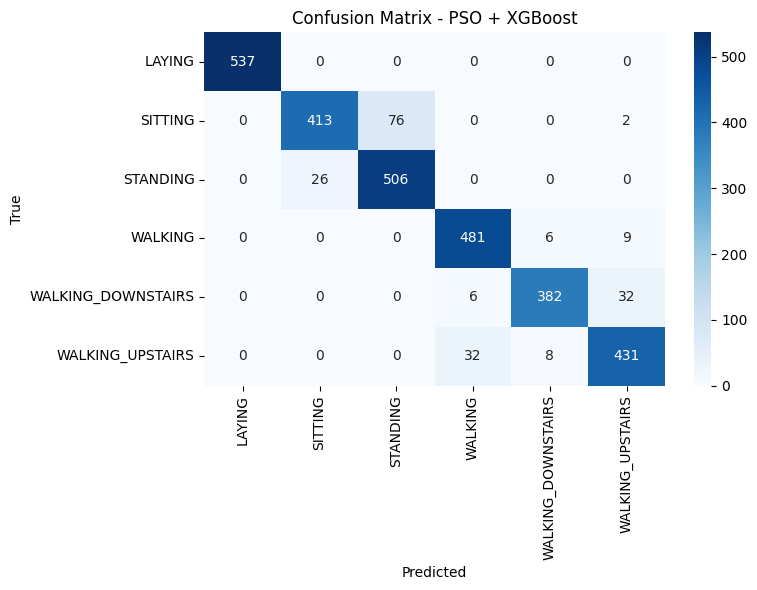

In [ ]:
# Train XGBoost on full training set with selected features
final_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
final_model.fit(X_train[selected_feature_names], y_train_enc)

# Predict and evaluate
y_pred = final_model.predict(X_test[selected_feature_names])

print("\n Final Test Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\n Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - PSO + XGBoost")
plt.tight_layout()
plt.show()
